## Final Project Submission

* Student name: Colleta Kiilu
* Student pace: self paced / **part time** / full time
* Scheduled project review date/time: 08/09/2024
* Instructor name: William Okomba
* Blog post URL: https://github.com/Collz472/Phase1_project.git


![airplane accident](https://gifdb.com/images/high/plane-jet-crash-explosion-jy9cqg43kri1oa2m.webp)
Source: [GIFDB.com](https://gifdb.com/)

# **OVERVIEW**
As part of the company's strategic growth into new markets, there is increasing interest in joining the aviation industry. The goal is to purchase and operate aircraft for both commercial and private enterprises. However, before making any decisions, the business needs to be aware of the possible dangers associated with various aircraft types.

This analysis focuses on identifying the lowest-risk aircraft models by reviewing data from the National Transportation Safety Board (NTSB) aviation accident database. The key indicators to be evaluated are damage to the aircraft, frequency of accidents/incidents and severity of injuries.

The data covers the period between 24 October 1948 and 29 December 2022.

Ultimately, this analysis will provide the company, under the guidance of the Head of the new Aviation Division, with data-driven insights and recommendations about which aircraft models to invest in for this new business venture.


## **BUSINESS** **UNDERSTANDING**
Boeing's 2024 commercial Market Outlooks (CMO) predics that air travel demand will outpace economic growth through 2043 with a forecast of nearly 44,0000 new airplane deliveries over the next 20years.

The total number rof passegers is expected to reach around 5 billion in 2024 with a load factor of 82.5% demonstrating high demand fro air travel.

Some of the facors that significantly increase the risk of accidents in aviation as reported by Skybrary include weather conditions, Flight phases, pilot decision making, aircraft design and geomagnetic storms among others.

Findings from this assessment will seek to identify trends over time as well as identify some of the facotors contributing to the accidnets and incidents reported

# **Business Questions**

1.   Which aircraft models have the lowest accident rates?
2.   Are there specific factors (e.g., weather conditions, flight phases) that significantly increase the risk of accidents for certain aircraft?
3. What are the trends over time, and how do they impact decision-making for future aircraft purchases?





# **DATA UNDERSTANDING**

In [1]:
# import data analysis libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data and create df
# df = pd.read_csv("AviationData.csv") # encoding issues
df = pd.read_csv("AviationData.csv", encoding="latin-1")

#checking the first 5 columns
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
#checking the last 5 columns
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [4]:
# checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
#checking the dataset shape
df.shape

(88889, 31)

The dataset 88889 records and 31 columns.

In [6]:
# Listing the columns in the dataset
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## **1. Data Cleaning**

### **a. Duplicates**

In [7]:
df.duplicated().sum()

# The data set has no duplicates

0

In [8]:
# make df copy to be used in data cleaning

data = df.copy()

### **b. Missing Values**

In [9]:
# percentage of missing values per column
# sorted in descending order

data.isna().sum().sort_values(ascending=False)/len(data)*100

,0
Schedule,85.845268
Air.carrier,81.271023
FAR.Description,63.974170
Aircraft.Category,63.677170
Longitude,61.330423
Latitude,61.320298
Airport.Code,43.601570
Airport.Name,40.708074
Broad.phase.of.flight,30.560587
Publication.Date,15.492356


In [10]:
# check for unique values in each column

for col in data.columns:
    print({col})
    print(data[col].unique())
    print()

{'Event.Id'}
['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513']

{'Investigation.Type'}
['Accident' 'Incident']

{'Accident.Number'}
['SEA87LA080' 'LAX94LA336' 'NYC07LA005' ... 'WPR23LA075' 'WPR23LA076'
 'ERA23LA097']

{'Event.Date'}
['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29']

{'Location'}
['MOOSE CREEK, ID' 'BRIDGEPORT, CA' 'Saltville, VA' ... 'San Manual, AZ'
 'Auburn Hills, MI' 'Brasnorte, ']

{'Country'}
['United States' nan 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Iceland'
 'Greece' 'Guam' 'Australia' 'CARIBBEAN SEA' 'West Indies' 'Japan'
 'Philippines' 'Venezuela' 'Bermuda' 'San Juan Islands' 'Colombia'
 'El Salvador' 'United Kingdom' 'British Virgin Islands' 'Netherlands'
 'Costa 

#### **i. Drop Unnecessary Columns**

In [11]:
#Drop irrelevant columns with a high percentage of missing values and may not add any value in my analysis

data.drop(['Schedule', 'Air.carrier', 'Latitude', 'Longitude','FAR.Description',
           'Accident.Number', 'Airport.Code', 'Airport.Name', 'Publication.Date', 'Location', 'Report.Status', 'Registration.Number'],
          axis=1, inplace=True)

In [12]:
# confirm dropped columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Country                 88663 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Amateur.Built           88787 non-null  object 
 10  Number.of.Engines       82805 non-null  float64
 11  Engine.Type             81793 non-null  object 
 12  Purpose.of.flight       82697 non-null  object 
 13  Total.Fatal.Injuries    77488 non-null  float64
 14  Total.Serious.Injuries  76379 non-null

#### **ii. Check Missing Values Percentage per Column**

In [13]:
# Check the number of missing values in each column

data.isna().sum().sort_values(ascending=False)

,0
Aircraft.Category,56602
Broad.phase.of.flight,27165
Total.Serious.Injuries,12510
Total.Minor.Injuries,11933
Total.Fatal.Injuries,11401
Engine.Type,7096
Purpose.of.flight,6192
Number.of.Engines,6084
Total.Uninjured,5912
Weather.Condition,4492


In [14]:
print(data['Aircraft.Category'].unique())

[nan 'Airplane' 'Helicopter' 'Glider' 'Balloon' 'Gyrocraft' 'Ultralight'
 'Unknown' 'Blimp' 'Powered-Lift' 'Weight-Shift' 'Powered Parachute'
 'Rocket' 'WSFT' 'UNK' 'ULTR']


- Missing values in the data will be dealt with as per the data in each column.

#### **iii. .fillna()**

- The `fillna()` method will be used to fill missing (NaN) values with a specified value.
- In the code below, *Unknown* and *0* were used.



In [15]:
# Replace missing values in 'Aircraft.Category' column with 'Unknown'
data['Aircraft.Category'].fillna('Unknown', inplace=True)

# Replace missing values in 'Broad.phase.of.flight' column with 'Unknown'
data['Broad.phase.of.flight'].fillna('Unknown', inplace=True)

# Replace missing values in 'Engine.Type' column with 'Unknown'
data['Engine.Type'].fillna('Unknown', inplace=True)

# Replace missing values in 'Purpose.of.flight' column with 'Unknown'
data['Purpose.of.flight'].fillna('Unknown', inplace=True)

# Replace missing values in 'Number.of.Engines' column with 'Unknown'
# the number of engines is also a critical factor when determing the model of aircraft to purchase
data['Number.of.Engines'].fillna(0, inplace=True)

# Replace missing values in 'Weather.Condition' column with 'UNK'
data['Weather.Condition'].fillna('Unknown', inplace=True)

# Replace missing values in 'Aircraft.damage' column with 'Unspecified'
data['Aircraft.damage'].fillna('Unspecified', inplace=True)

# Replace missing values in 'Country' column with 'Unknown'
data['Country'].fillna('Unknown', inplace=True)

# Replace missing values in 'Amateur.Built' column with 'Unknown'
data['Amateur.Built'].fillna('Unknown', inplace=True)

# Replace missing values in 'Make' column with 'Unknown'
data['Make'].fillna('Unknown', inplace=True)

# Replace missing values in 'Total.Serious.Injuries' column with 0
data['Total.Serious.Injuries'].fillna(0, inplace=True)

# Replace missing values in 'Total.Minor.Injuries' column with 0
data['Total.Minor.Injuries'].fillna(0, inplace=True)



# Replace all missing values(Blanks) in 'Total.Fatal.Injuries' column with 0 as they are all 'Non-Fatal' cases
# when compared with data in the 'Injury.severity' column
data['Total.Fatal.Injuries'].fillna(0, inplace=True)

# Replace missing values in 'Injury.Severity' column with 'Unknown'
data['Injury.Severity'].fillna('Unknown', inplace=True)

### **c. Data Manipulation**
- The `.replace()` method will substitute specific values with new values depending on the data in the column.
- This is mainly for uniformity and ease of understanding the findings.

In [16]:
# Replace all 'Incident' in 'Injury.Severity' column with 'Non-Fatal'
data['Injury.Severity'].replace('Incident',  'Non-Fatal', inplace=True)

# Replace all 'Unavailable' in 'Injury.Severity' column with 'Unknown'
data['Injury.Severity'].replace('Unavailable',  'Unknown', inplace=True)

# Strip all numbericals from 'Injury.Severity' column as they are already included in the 'Total.Fatal.Injuries' column
# data['Injury.Severity'].str.replace(r'\(\d+\)', '', regex=True)
data['Injury.Severity'] = data['Injury.Severity'].str.replace(r'\(\d+\)', '', regex=True)

# Replace all 'UNK' and 'Unk\ in 'Weather.Condition' column with 'Unknown' for uniformity
data['Weather.Condition'].replace('UNK',  'Unknown', inplace=True)
data['Weather.Condition'].replace('Unk',  'Unknown', inplace=True)

- The `Total.Fatal.Injuries` and `Total.Uninjured` columns required some additonal manipulation because some records had a figure for both fatality and uninjured.
- However, it is impossible to have a fatality and uninjured within the same event since the fatalities suffred 'fatal injuries'.

In [17]:
# Replace all blanks in 'Total.Uninjured' column with '0' if 'Total.Fatal.Injuries' column has a value greater than or equal to 1.
data.loc[(data['Total.Fatal.Injuries'] >= 1) & (data['Total.Uninjured'].isnull()), 'Total.Uninjured'] = 0
data['Total.Uninjured'].fillna(0, inplace=True)

- Convert all float64 to int64 to make them whole numbers since human beings are whole.

In [18]:
# Convert columns with float64 to int64
data['Total.Fatal.Injuries'] = data['Total.Fatal.Injuries'].astype('int64')
data['Total.Serious.Injuries'] = data['Total.Serious.Injuries'].astype('int64')
data['Total.Minor.Injuries'] = data['Total.Minor.Injuries'].astype('int64')
data['Total.Uninjured'] = data['Total.Uninjured'].astype('int64')
data['Number.of.Engines'] = data['Number.of.Engines'].astype('int64')

- The `Make` column needs some case conversion

In [19]:
data['Make']

,Make
0,Stinson
1,Piper
2,Cessna
3,Rockwell
4,Cessna
...,...
88884,PIPER
88885,BELLANCA
88886,AMERICAN CHAMPION AIRCRAFT
88887,CESSNA


In [20]:
# convert case
data['Make'] = data['Make'].str.title()
data['Make'].tail(10)

,Make
88879,Airbus
88880,Piper
88881,Cessna
88882,Grumman American Avn. Corp.
88883,Air Tractor
88884,Piper
88885,Bellanca
88886,American Champion Aircraft
88887,Cessna
88888,Piper


- The `Model` column also required some extra cleaning to make the data uniform.

In [21]:
column_name = 'Model'
print(data[column_name].unique())

['108-3' 'PA24-180' '172M' ... 'ROTORWAY EXEC 162-F' 'KITFOX S5'
 'M-8 EAGLE']


In [22]:
# Data cleaning for the 'model' column which is very critical for analysis
# The goal is to purchase and operate aircraft for both commercial and private enterprises hence the anlayisis will focus on idenifying the low risk models for evidence based deciosn making

# Replace all 'wrongly spelt model names' in 'model' column with 'the correct model names as listed'
data['Model'].replace('PA24-180',  'PA-24-180', inplace=True)
data['Model'].replace('PA28-161',  'PA-28-161', inplace=True)
data['Model'].replace('R22 MARINER',  'R-22 MARINER', inplace=True)
data['Model'].replace('S2R', 'S-2R', inplace=True)

# Replace missing values in 'Model' column with 'Unknown'
data['Model'].fillna('Unknown', inplace=True)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Event.Id                88889 non-null  object
 1   Investigation.Type      88889 non-null  object
 2   Event.Date              88889 non-null  object
 3   Country                 88889 non-null  object
 4   Injury.Severity         88889 non-null  object
 5   Aircraft.damage         88889 non-null  object
 6   Aircraft.Category       88889 non-null  object
 7   Make                    88889 non-null  object
 8   Model                   88889 non-null  object
 9   Amateur.Built           88889 non-null  object
 10  Number.of.Engines       88889 non-null  int64 
 11  Engine.Type             88889 non-null  object
 12  Purpose.of.flight       88889 non-null  object
 13  Total.Fatal.Injuries    88889 non-null  int64 
 14  Total.Serious.Injuries  88889 non-null  int64 
 15  To

In [24]:
# view the data to confirm data cleaning
data.head()

,Event.Id,Investigation.Type,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,20001218X45444,Accident,1948-10-24,United States,Fatal,Destroyed,Unknown,Stinson,108-3,No,1,Reciprocating,Personal,2,0,0,0,Unknown,Cruise
1,20001218X45447,Accident,1962-07-19,United States,Fatal,Destroyed,Unknown,Piper,PA-24-180,No,1,Reciprocating,Personal,4,0,0,0,Unknown,Unknown
2,20061025X01555,Accident,1974-08-30,United States,Fatal,Destroyed,Unknown,Cessna,172M,No,1,Reciprocating,Personal,3,0,0,0,IMC,Cruise
3,20001218X45448,Accident,1977-06-19,United States,Fatal,Destroyed,Unknown,Rockwell,112,No,1,Reciprocating,Personal,2,0,0,0,IMC,Cruise
4,20041105X01764,Accident,1979-08-02,United States,Fatal,Destroyed,Unknown,Cessna,501,No,0,Unknown,Personal,1,2,0,0,VMC,Approach


- All missing values in the data set have been filled.
- All records have been maintained.

### **c. Convert Event.Date Column to DateTime**
- The time-related `Event.Date` column will be used to generate year and month for periodic analysis.
- First, it is converted to `DateTime` format.

In [25]:
data['Event.Date'] = pd.to_datetime(data['Event.Date'])
data['Event.Date'].dtype # confirm datatype

dtype('<M8[ns]')

In [26]:
data['Event.Date'].head()

,Event.Date
0,1948-10-24
1,1962-07-19
2,1974-08-30
3,1977-06-19
4,1979-08-02


- The `Event.Year` and `Event.Month` columns are then created.

In [27]:
# extract year and month and create Event.Year and Event.Month columns

data['Event.Year'] = data['Event.Date'].dt.year
data['Event.Month'] = data['Event.Date'].dt.month_name()
data.head()

,Event.Id,Investigation.Type,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Event.Year,Event.Month
0,20001218X45444,Accident,1948-10-24,United States,Fatal,Destroyed,Unknown,Stinson,108-3,No,...,Reciprocating,Personal,2,0,0,0,Unknown,Cruise,1948,October
1,20001218X45447,Accident,1962-07-19,United States,Fatal,Destroyed,Unknown,Piper,PA-24-180,No,...,Reciprocating,Personal,4,0,0,0,Unknown,Unknown,1962,July
2,20061025X01555,Accident,1974-08-30,United States,Fatal,Destroyed,Unknown,Cessna,172M,No,...,Reciprocating,Personal,3,0,0,0,IMC,Cruise,1974,August
3,20001218X45448,Accident,1977-06-19,United States,Fatal,Destroyed,Unknown,Rockwell,112,No,...,Reciprocating,Personal,2,0,0,0,IMC,Cruise,1977,June
4,20041105X01764,Accident,1979-08-02,United States,Fatal,Destroyed,Unknown,Cessna,501,No,...,Unknown,Personal,1,2,0,0,VMC,Approach,1979,August


In [28]:
# confirm the unique values
for col in data.columns:
    print({col})
    print(data[col].unique())
    print()

{'Event.Id'}
['20001218X45444' '20001218X45447' '20061025X01555' ... '20221227106497'
 '20221227106498' '20221230106513']

{'Investigation.Type'}
['Accident' 'Incident']

{'Event.Date'}
<DatetimeArray>
['1948-10-24 00:00:00', '1962-07-19 00:00:00', '1974-08-30 00:00:00',
 '1977-06-19 00:00:00', '1979-08-02 00:00:00', '1979-09-17 00:00:00',
 '1981-08-01 00:00:00', '1982-01-01 00:00:00', '1982-01-02 00:00:00',
 '1982-01-03 00:00:00',
 ...
 '2022-12-13 00:00:00', '2022-12-14 00:00:00', '2022-12-15 00:00:00',
 '2022-12-16 00:00:00', '2022-12-17 00:00:00', '2022-12-18 00:00:00',
 '2022-12-21 00:00:00', '2022-12-22 00:00:00', '2022-12-26 00:00:00',
 '2022-12-29 00:00:00']
Length: 14782, dtype: datetime64[ns]

{'Country'}
['United States' 'Unknown' 'GULF OF MEXICO' 'Puerto Rico' 'ATLANTIC OCEAN'
 'HIGH ISLAND' 'Bahamas' 'MISSING' 'Pakistan' 'Angola' 'Germany'
 'Korea, Republic Of' 'Martinique' 'American Samoa' 'PACIFIC OCEAN'
 'Canada' 'Bolivia' 'Mexico' 'Dominica' 'Netherlands Antilles' 'Ice

In [29]:
# The data is now clean for Exploratory data analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Event.Date              88889 non-null  datetime64[ns]
 3   Country                 88889 non-null  object        
 4   Injury.Severity         88889 non-null  object        
 5   Aircraft.damage         88889 non-null  object        
 6   Aircraft.Category       88889 non-null  object        
 7   Make                    88889 non-null  object        
 8   Model                   88889 non-null  object        
 9   Amateur.Built           88889 non-null  object        
 10  Number.of.Engines       88889 non-null  int64         
 11  Engine.Type             88889 non-null  object        
 12  Purpose.of.flight       88889 non-null  object

- After data cleaning, the data now has 21 columns and 88889 records/events.
- Converting to CSV will also ensure that the cleaned data is ready for dashboard creation.

In [30]:
#save the new dataframe in csv format

data.to_csv('cleaned_aviation_data.csv', index=False)

# **EXPLORATORY DATA ANALYSIS (EDA)**

**EDA columns of interest**  
 - '`Country`'
 - '`Injury.Severity`',
 - '`Aircraft.damage`',
 - '`Aircraft.Category`', ,
 - '`Make`',
 - '`Model`',
 - '`Engine.Type`',
 - '`Schedule`',
 - '`Purpose.of.flight`',
 - '`Total.Fatal.Injuries`',
 - '`Total.Uninjured`',
 - '`Weather.Condition`',
 - '`Broad.phase.of.flight`'


**The columns will be analysed to answer the questions below:**

1. What are the most reliable aircraft models(with lowest risks) in the market, both for commercial and private use

2. Are there specific factors (e.g., weather conditions, flight phases) that significantly increase the risk of accidents for certain aircraft?

3. What is the level of severity for the top 15 prefered models?

4. What is the incidence rate by Country, year, purpose of flight and model?

In [31]:
# Now load the clean data set for EDA

aviation = pd.read_csv('cleaned_aviation_data.csv')

aviation['Event.Date'] = pd.to_datetime(aviation['Event.Date'])

aviation.head()

,Event.Id,Investigation.Type,Event.Date,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Event.Year,Event.Month
0,20001218X45444,Accident,1948-10-24,United States,Fatal,Destroyed,Unknown,Stinson,108-3,No,...,Reciprocating,Personal,2,0,0,0,Unknown,Cruise,1948,October
1,20001218X45447,Accident,1962-07-19,United States,Fatal,Destroyed,Unknown,Piper,PA-24-180,No,...,Reciprocating,Personal,4,0,0,0,Unknown,Unknown,1962,July
2,20061025X01555,Accident,1974-08-30,United States,Fatal,Destroyed,Unknown,Cessna,172M,No,...,Reciprocating,Personal,3,0,0,0,IMC,Cruise,1974,August
3,20001218X45448,Accident,1977-06-19,United States,Fatal,Destroyed,Unknown,Rockwell,112,No,...,Reciprocating,Personal,2,0,0,0,IMC,Cruise,1977,June
4,20041105X01764,Accident,1979-08-02,United States,Fatal,Destroyed,Unknown,Cessna,501,No,...,Unknown,Personal,1,2,0,0,VMC,Approach,1979,August


In [32]:
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      88889 non-null  object        
 2   Event.Date              88889 non-null  datetime64[ns]
 3   Country                 88889 non-null  object        
 4   Injury.Severity         88889 non-null  object        
 5   Aircraft.damage         88889 non-null  object        
 6   Aircraft.Category       88889 non-null  object        
 7   Make                    88889 non-null  object        
 8   Model                   88889 non-null  object        
 9   Amateur.Built           88889 non-null  object        
 10  Number.of.Engines       88889 non-null  int64         
 11  Engine.Type             88889 non-null  object        
 12  Purpose.of.flight       88889 non-null  object

In [33]:
# summary statistics for numerical columns
aviation.describe()

,Event.Date,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Event.Year
count,88889,88889.000000,88889.000000,88889.000000,88889.000000,88889.000000,88889.000000
mean,1999-09-17 17:13:39.354475904,1.068107,0.564761,0.240491,0.309127,4.971245,1999.206662
min,1948-10-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,1948.000000
25%,1989-01-15 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,1989.000000
50%,1998-07-18 00:00:00,1.000000,0.000000,0.000000,0.000000,1.000000,1998.000000
75%,2009-07-01 00:00:00,1.000000,0.000000,0.000000,0.000000,2.000000,2009.000000
max,2022-12-29 00:00:00,8.000000,349.000000,161.000000,380.000000,699.000000,2022.000000
std,NaN,0.519181,5.126649,1.434614,2.083715,27.002011,11.888226


## **1. Univariate Data Analysis**

### **a. Count of Events**
**Insights**
- The Figure below shows that 96% of all events that happened were accidents while only 4% were incidents.

- An **accident** is defined as “an occurrence associated with the operation of an aircraft which takes place between the time any person boards the aircraft with the intention of flight and all such persons have disembarked, and in which any person suffers death or serious injury, or in which the aircraft receives substantial damage”.
-An **incident** is defined as “an occurrence other than an accident, associated with the operation of an aircraft, which affects or could affect the safety of operations.”

Investigation.Type
Accident    85015
Incident     3874
Name: count, dtype: int64
****************************************************************************************************


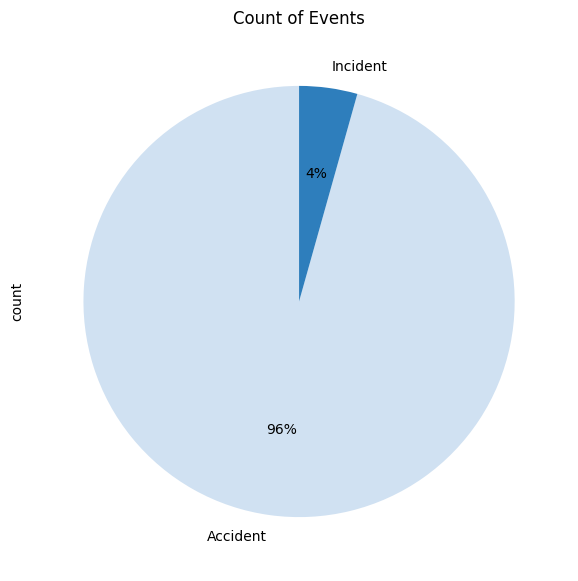

In [34]:
# number of occurences for each event type
investigation_type_counts = aviation['Investigation.Type'].value_counts()
print(investigation_type_counts)
print('*'*100)

# pie chart
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(investigation_type_counts)))

plt.figure(figsize=(10, 7))
investigation_type_counts.plot(
    kind='pie', autopct='%1.0f%%',
    startangle=90,
    colors=colors
    )
plt.title("Count of Events")
plt.show()

### **b. Count of events by Make of Aircraft**
- This will reveal the aircraft makes that was involved in the most events over the period under analysis.

**Insights**
- There are 7587 makes in the dataset.
- The top 5 aircraft makes with the highest number of events are;  Cessna (27,146), Piper (14,869), Beech (5,372), Boeing (2,745) and Bell (2,722).
- This may mean that these makes are either:
  - a preferred model in the industry and/or;
  - most prone to experiencing aviation incidents and accidents.
- Royse Ralph L, Izatt, Lutes, Kitchens and Cohen had one incident/accident each.

In [35]:
# events by make
make_counts = aviation['Make'].value_counts()

print('Top 10:\n', make_counts.head(10))

print()

print('Bottom 10:\n', make_counts.tail(10))


Top 10:
 Make
Cessna      27149
Piper       14870
Beech        5372
Boeing       2745
Bell         2722
Mooney       1334
Robinson     1230
Grumman      1172
Bellanca     1045
Hughes        932
Name: count, dtype: int64

Bottom 10:
 Make
Mckinnis                 1
Aeronca-Bubeck Irving    1
Trike                    1
Aero Comp Inc            1
Burak Stanley A          1
Cohen                    1
Kitchens                 1
Lutes                    1
Izatt                    1
Royse Ralph L            1
Name: count, dtype: int64


In [36]:
make_counts.info()

<class 'pandas.core.series.Series'>
Index: 7587 entries, Cessna to Royse Ralph L
Series name: count
Non-Null Count  Dtype
--------------  -----
7587 non-null   int64
dtypes: int64(1)
memory usage: 118.5+ KB


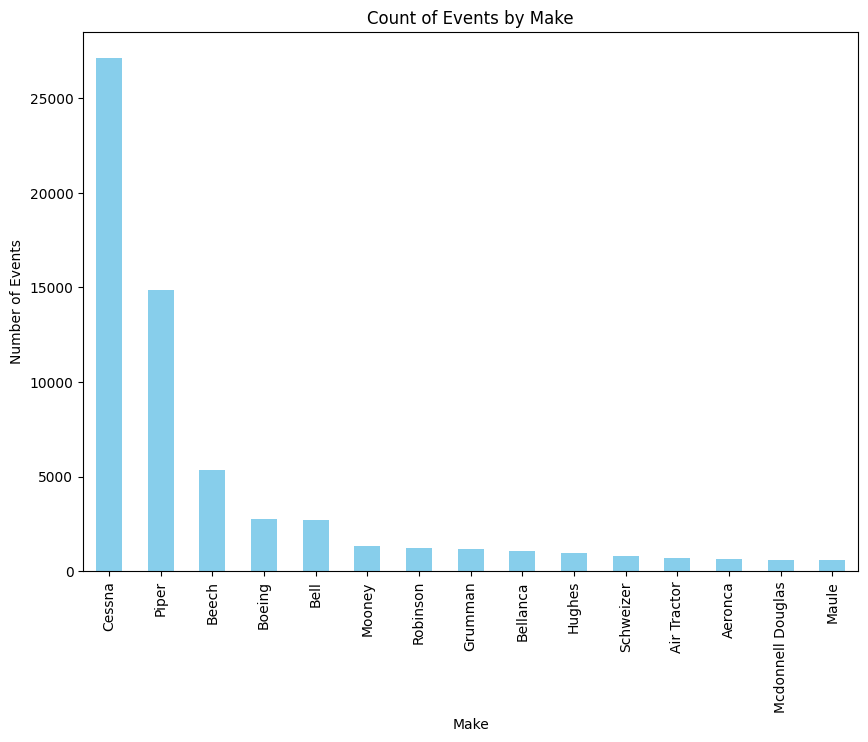

In [37]:
# bar chart
plt.figure(figsize=(10, 7))
make_counts.head(15).plot(kind='bar', color='skyblue')
plt.title("Count of Events by Make")
plt.xlabel("Make")
plt.ylabel("Number of Events")
plt.show()

### **Damage to the Aircraft per Event**

Aircraft.damage
Substantial    64148
Destroyed      18623
Unspecified     3194
Minor           2805
Unknown          119
Name: count, dtype: int64
******************************************************************************************************************************************************


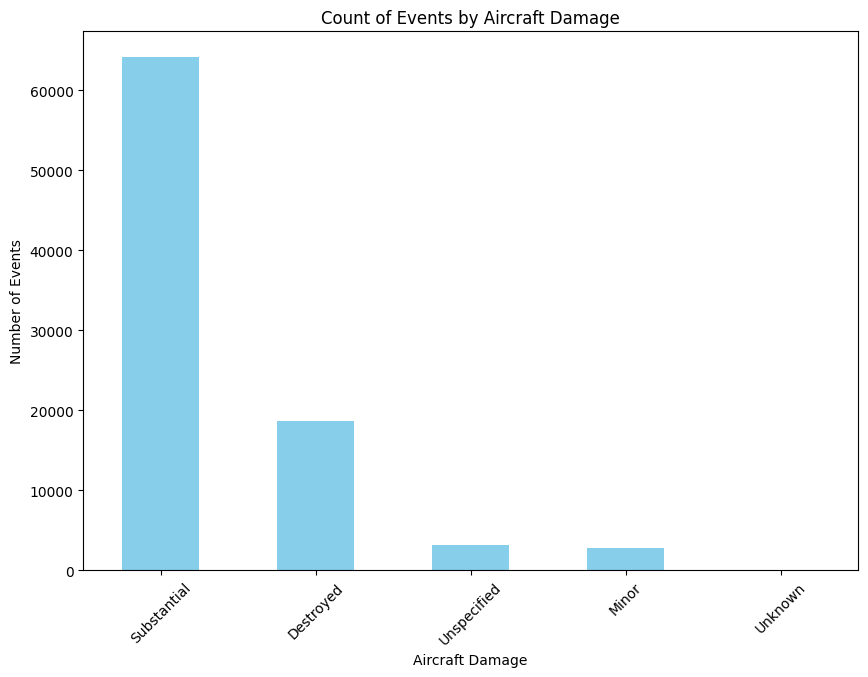

In [38]:

print(aviation['Aircraft.damage'].value_counts())
print('*'*150)

plt.figure(figsize=(10, 7))
aviation['Aircraft.damage'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Count of Events by Aircraft Damage")
plt.xlabel("Aircraft Damage")
plt.ylabel("Number of Events")
plt.xticks(rotation=45)
plt.show()

### **b. Count of events by country**
**Insights**
- United States had the highest numbers of events at 82,248 (92.5%) including both accidents and incidents, followed by Brazil with 374 events (0.4%).

- The high concentration of events in the United States (US) is due to the fact that the National Transportation Safety Board (NTSB) mainly deals with accidents within the US, in international waters, or with US aircrafts.

In [39]:
# events per country
country_counts = aviation['Country'].value_counts()
print('Top 10: ', country_counts.head(10))
print('*'*150)
print('Bottom 10: ', country_counts.tail(10))

Top 10:  Country
United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Australia           300
France              236
Unknown             229
Spain               226
Bahamas             216
Name: count, dtype: int64
******************************************************************************************************************************************************
Bottom 10:  Country
Ivory Coast                         1
Palau                               1
Niger                               1
Libya                               1
Liberia                             1
Saint Vincent and the Grenadines    1
Cambodia                            1
Malampa                             1
AY                                  1
Turks and Caicos Islands            1
Name: count, dtype: int64


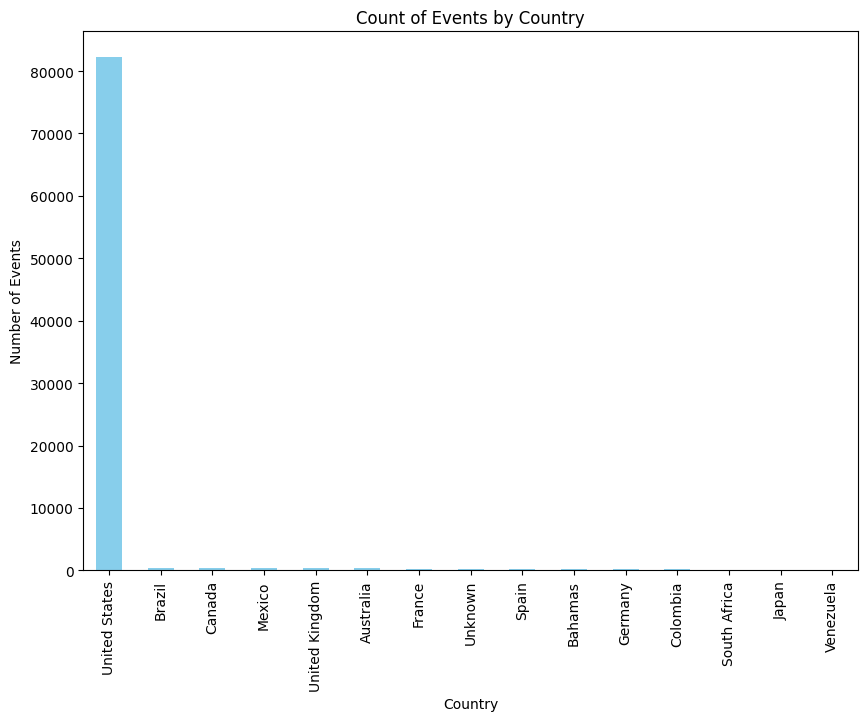

In [40]:
# bar chart
plt.figure(figsize=(10, 7))
aviation["Country"].value_counts().head(15).plot(kind='bar', color='skyblue')
plt.title("Count of Events by Country")
plt.xlabel("Country")
plt.ylabel("Number of Events")
plt.show()

### **Events by Purpose of Flight**
- Most events occured during personal flights.

Purpose.of.flight
Personal                     49448
Unknown                      12994
Instructional                10601
Aerial Application            4712
Business                      4018
Positioning                   1646
Other Work Use                1264
Ferry                          812
Aerial Observation             794
Public Aircraft                720
Executive/corporate            553
Flight Test                    405
Skydiving                      182
External Load                  123
Public Aircraft - Federal      105
Banner Tow                     101
Air Race show                   99
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      53
Firefighting                    40
Air Drop                        11
ASHO                             6
PUBS                             4
PUBL                             1
Name: count, dtype: int64
**********************************************

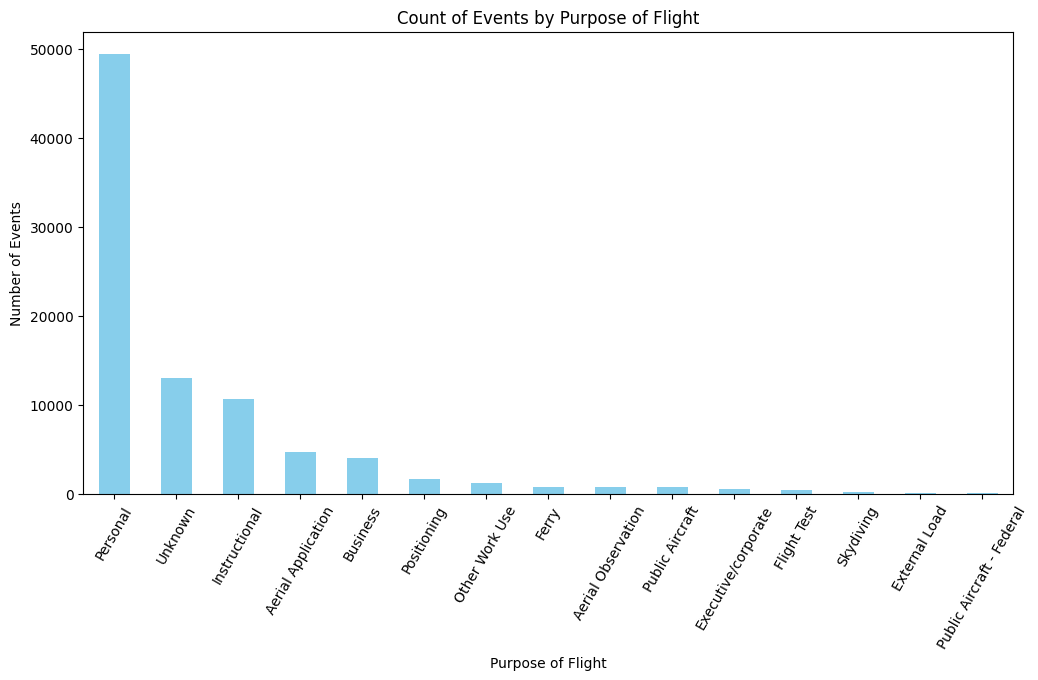

In [41]:
flight_purpose = aviation['Purpose.of.flight'].value_counts()
print(flight_purpose)
print('*'*150)

# bar chart
plt.figure(figsize=(12, 6))
flight_purpose.head(15).plot(kind='bar', color='skyblue')
plt.title("Count of Events by Purpose of Flight")
plt.xlabel("Purpose of Flight")
plt.ylabel("Number of Events")
plt.xticks(rotation=60)
plt.show()

### **c. Count of Events by Year and Month**

In [42]:
# events per year
aviation.groupby("Event.Year").size().reset_index(name="Count")

,Event.Year,Count
0,1948,1
1,1962,1
2,1974,1
3,1977,1
4,1979,2
5,1981,1
6,1982,3593
7,1983,3556
8,1984,3457
9,1985,3096


- On further analysis, it was noted that events recorded between 1948 and 1981 are few.
- Records with those years will be dropped.
- There are now 88,882 records/events.

In [43]:
# drop events recorded between 1948 and 1981
aviation = aviation[(aviation['Event.Year'] < 1948) | (aviation['Event.Year'] > 1981)]
aviation.reset_index(drop=True, inplace=True)
aviation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88882 entries, 0 to 88881
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88882 non-null  object        
 1   Investigation.Type      88882 non-null  object        
 2   Event.Date              88882 non-null  datetime64[ns]
 3   Country                 88882 non-null  object        
 4   Injury.Severity         88882 non-null  object        
 5   Aircraft.damage         88882 non-null  object        
 6   Aircraft.Category       88882 non-null  object        
 7   Make                    88882 non-null  object        
 8   Model                   88882 non-null  object        
 9   Amateur.Built           88882 non-null  object        
 10  Number.of.Engines       88882 non-null  int64         
 11  Engine.Type             88882 non-null  object        
 12  Purpose.of.flight       88882 non-null  object

In [44]:
# group events by year
events_per_year = aviation.groupby("Event.Year").size().reset_index(name="Count")
events_per_year

,Event.Year,Count
0,1982,3593
1,1983,3556
2,1984,3457
3,1985,3096
4,1986,2880
5,1987,2828
6,1988,2730
7,1989,2544
8,1990,2518
9,1991,2462


**Insights**
- The year 1982 recorded the highest number of events while 2020 had the least.
- The declining count of events may point to increased safety measures in the aviation industry.
- The COVID19 pandemic in 2020 may have caused lesser air travel, hence, the low number of accidents and incidents.

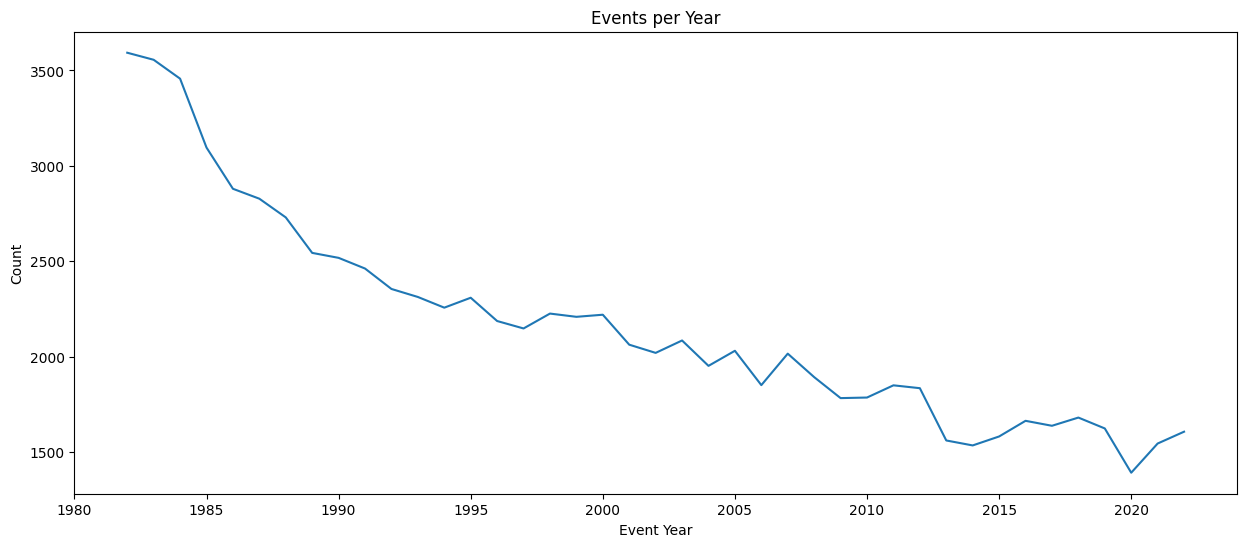

In [45]:
# line graph
plt.figure(figsize=(15, 6))
plt.plot(events_per_year['Event.Year'], events_per_year['Count'])
plt.xlabel('Event Year')
plt.ylabel('Count')
plt.title('Events per Year')
plt.show()

In [46]:
# events per month
events_per_month = aviation.groupby('Event.Month').size().reset_index(name='Count')
events_per_month

,Event.Month,Count
0,April,7248
1,August,9983
2,December,5060
3,February,5285
4,January,4985
5,July,10697
6,June,9560
7,March,6686
8,May,8514
9,November,5538


**Insights**
- The months of June, July and August record the highest number of events (accidents and incidents).
- On the other hand, November, December, January and February have the least number of events.
- The trend can be attributed to the fact that June, July and August are summer months in US (country with most events) and people tend to travel more during the season. November, December, January and February are winter months and record less air travel.

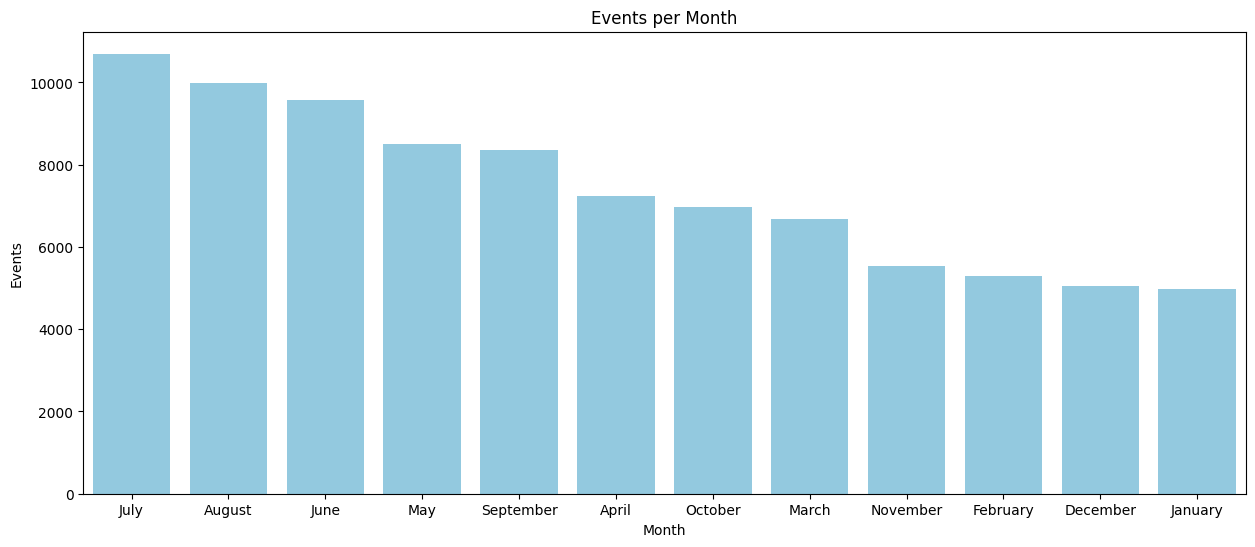

In [47]:
plt.figure(figsize=(15, 6))
sns.barplot(x="Event.Month", y="Count",
            data=events_per_month.sort_values(by="Count", ascending=False), color='skyblue')
plt.title("Events per Month")
plt.xlabel("Month")
plt.ylabel("Events")
plt.show()

### **d. Events by Weather Condition**
- Weather conditions description:
  - **IMC**: Instrument Meteorological Conditions; bad weather
  - **VMC**: Visual Meteorological Condition; means good weather
- Most events happened during good weather.

  Weather.Condition  Count
0               IMC   5973
1           Unknown   5608
2               VMC  77301
****************************************************************************************************


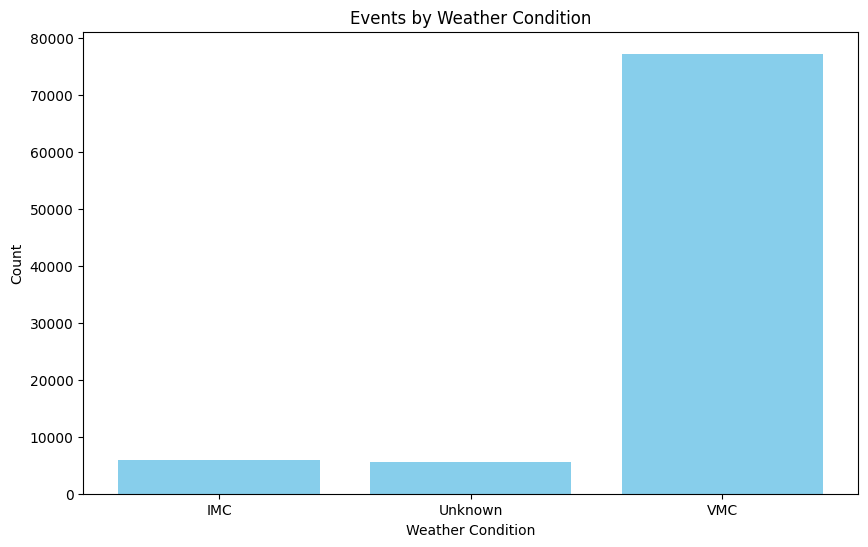

In [48]:
weather_counts = aviation.groupby('Weather.Condition').size().reset_index(name="Count")
print(weather_counts)
print('*'*100)

# bar chart
plt.figure(figsize=(10, 6))
plt.bar(weather_counts['Weather.Condition'], weather_counts['Count'], color='skyblue')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.title('Events by Weather Condition')
plt.show()

### **f. Severity of Injuries**
**Insights**
- **78.3%** of all events that occured were Non-Fatal while only **20.1%** were Fatal.

Injury.Severity
Non-Fatal    69575
Fatal        17820
Unknown       1096
Minor          218
Serious        173
Name: count, dtype: int64
******************************************************************************************************************************************************


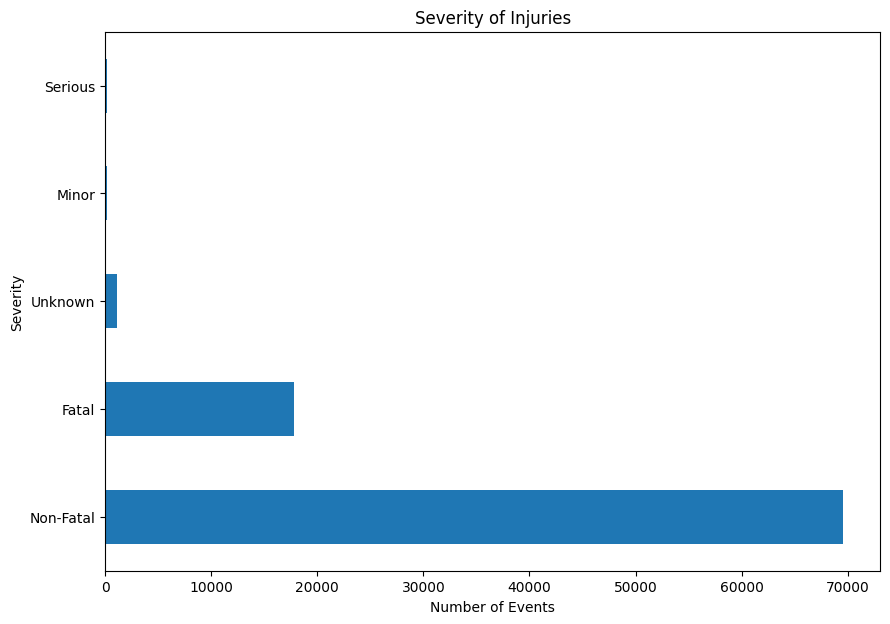

In [49]:
# injury severity count
injury_severity_counts = aviation['Injury.Severity'].value_counts()
print(injury_severity_counts)
print('*'*150)

# bar chart
plt.figure(figsize=(10, 7))
injury_severity_counts.head(15).plot(kind='barh')
plt.title("Severity of Injuries")
plt.xlabel("Number of Events")
plt.ylabel("Severity")
plt.show()

## **2. Bivariate Analysis**

### **a. Aircraft Make and the Severity of Injuries**

In [50]:
# injury severity by make
injury_severity_by_make = aviation.groupby(
    ['Make', 'Injury.Severity']).size().reset_index(
        name='Count').sort_values(
            by=['Count'], ascending=[False]
            )
injury_severity_by_make.head(10)


,Make,Injury.Severity,Count
1503,Cessna,Non-Fatal,22329
6005,Piper,Non-Fatal,11586
1501,Cessna,Fatal,4634
785,Beech,Non-Fatal,3766
6003,Piper,Fatal,3200
811,Bell,Non-Fatal,2092
1004,Boeing,Non-Fatal,2073
783,Beech,Fatal,1574
3333,Grumman,Non-Fatal,1040
5418,Mooney,Non-Fatal,949


**Insights**
- Cessna, having the highest number of events recorded against it, also has the highest number of both fatal and non-fatal injuries.
- Piper follows at second place.

In [51]:
# Filter for the top 10 makes with the highest number of events
top_10_makes = make_counts.head(10).index
bottom_10_makes = make_counts.tail(10).index
# make_counts = aviation['Make'].value_counts()
print(top_10_makes)

# only have top 10 makes
filtered_top_10_makes = injury_severity_by_make[injury_severity_by_make['Make'].isin(top_10_makes)]

Index(['Cessna', 'Piper', 'Beech', 'Boeing', 'Bell', 'Mooney', 'Robinson',
       'Grumman', 'Bellanca', 'Hughes'],
      dtype='object', name='Make')


In [52]:
bottom_10_makes

Index(['Mckinnis', 'Aeronca-Bubeck Irving', 'Trike', 'Aero Comp Inc',
       'Burak Stanley A', 'Cohen', 'Kitchens', 'Lutes', 'Izatt',
       'Royse Ralph L'],
      dtype='object', name='Make')

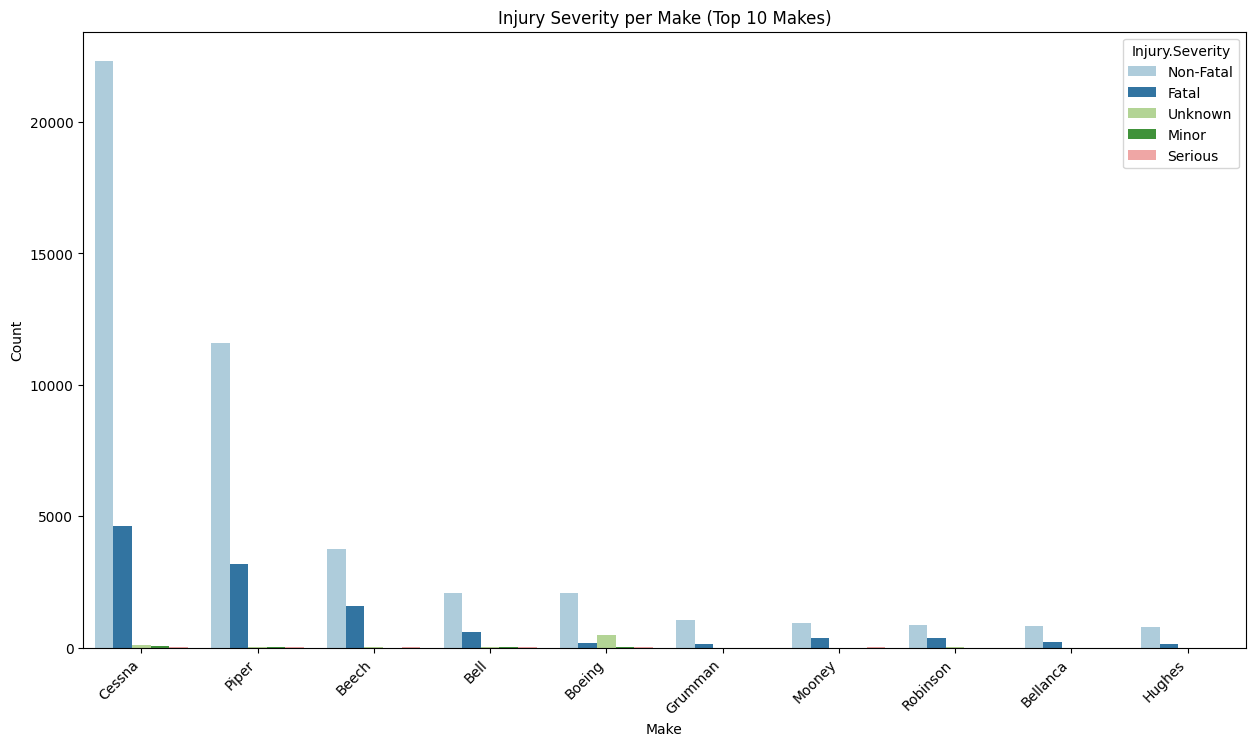

In [53]:
# Create a bar plot
plt.figure(figsize=(15, 8))
sns.barplot(x='Make', y='Count', hue='Injury.Severity', data=filtered_top_10_makes, palette='Paired')
plt.title('Injury Severity per Make (Top 10 Makes)')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [54]:
# no injuries by make
no_injury_make = aviation.groupby(
    ['Make', 'Total.Uninjured']).size().reset_index(
        name='Count').sort_values(
            by=['Count'], ascending=[False]
            )
no_injury_make.head(10)

,Make,Total.Uninjured,Count
2493,Cessna,0,9320
2494,Cessna,1,9010
8127,Piper,0,5888
2495,Cessna,2,5520
8128,Piper,1,4040
8129,Piper,2,3152
1158,Beech,0,2408
2496,Cessna,3,1586
1210,Bell,0,1259
1159,Beech,1,1089


### **b. Compare Injuries and Fatalities per Make**

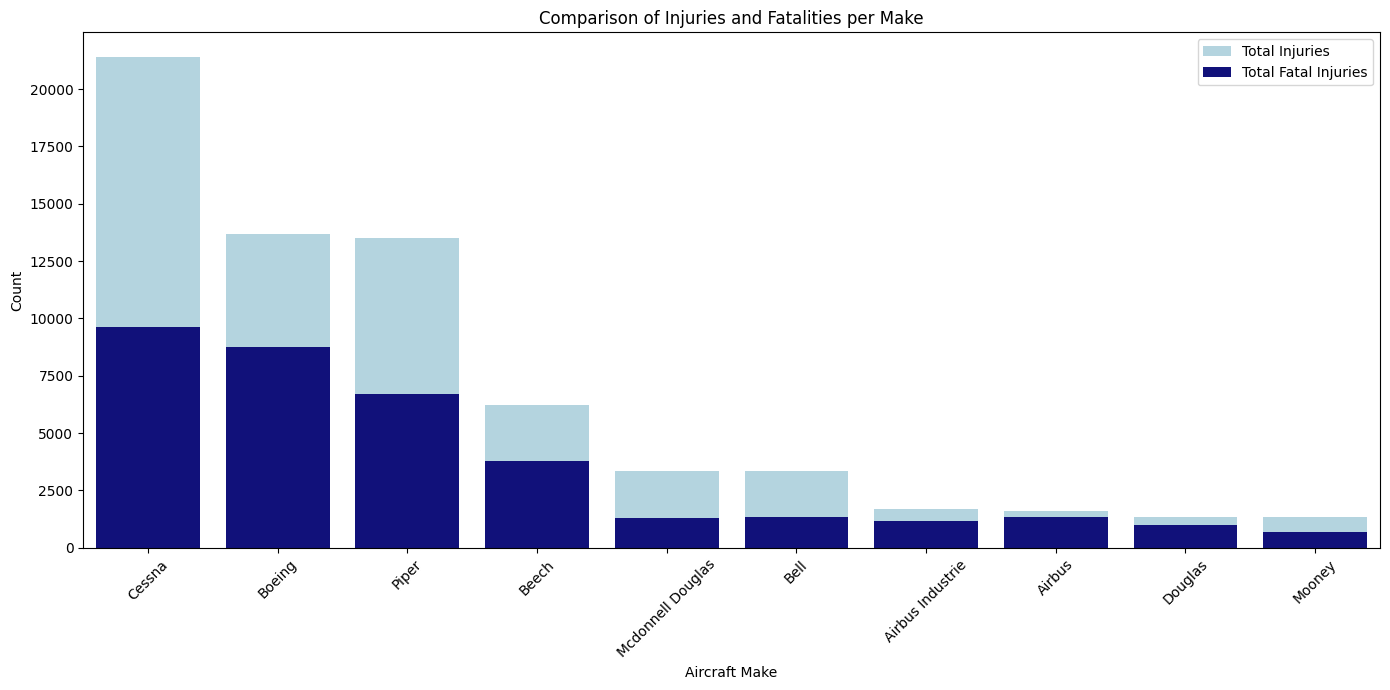

In [55]:
# df with make and injuries,fatalities
make_injuries_fatalities = aviation.groupby('Make').agg({
    'Total.Fatal.Injuries': 'sum',
    'Total.Serious.Injuries': 'sum',
    'Total.Minor.Injuries': 'sum'
}).reset_index()
# make_injuries_fatalities

# sum all injuries and sort descending
make_injuries_fatalities['Total.Injuries'] = make_injuries_fatalities['Total.Fatal.Injuries'] + make_injuries_fatalities['Total.Serious.Injuries'] + make_injuries_fatalities['Total.Minor.Injuries']
make_injuries_fatalities = make_injuries_fatalities.sort_values(by='Total.Injuries', ascending=False) # sort
# make_injuries_fatalities

# plot the top 10 makes by total injuries and fatalities
plt.figure(figsize=(14, 7))
sns.barplot(x='Make', y='Total.Injuries', data=make_injuries_fatalities.head(10), color='lightblue', label='Total Injuries')
sns.barplot(x='Make', y='Total.Fatal.Injuries', data=make_injuries_fatalities.head(10), color='darkblue', label='Total Fatal Injuries')
plt.xlabel('Aircraft Make')
plt.ylabel('Count')
plt.title('Comparison of Injuries and Fatalities per Make')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### **Damage to Aircraft by Make**
**Insights**
- Most Cessna, Piper, Beech and Bell had the highest Substantial and Destroyed damages.
- Notably, Boeing had higher minor destruction counts than other makes.

          Make Aircraft.damage  Count
808      Beech       Destroyed   1585
809      Beech           Minor    170
810      Beech     Substantial   3539
811      Beech         Unknown      5
812      Beech     Unspecified     73
838       Bell       Destroyed    708
839       Bell           Minor     47
840       Bell     Substantial   1900
841       Bell         Unknown      5
842       Bell     Unspecified     62
881   Bellanca       Destroyed    233
882   Bellanca           Minor      7
883   Bellanca     Substantial    800
884   Bellanca     Unspecified      5
1037    Boeing       Destroyed    170
1038    Boeing           Minor    711
1039    Boeing     Substantial    739
1040    Boeing         Unknown     11
1041    Boeing     Unspecified   1114
1554    Cessna       Destroyed   5199
1555    Cessna           Minor    387
1556    Cessna     Substantial  21268
1557    Cessna         Unknown     38
1558    Cessna     Unspecified    254
3426   Grumman       Destroyed    299
3427   Grumm

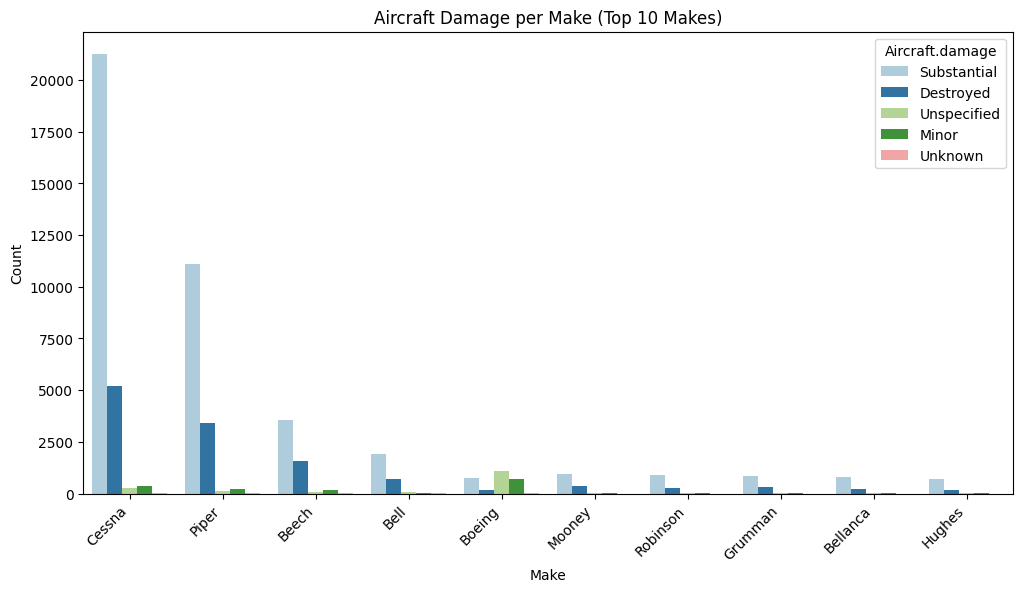

In [56]:
# group by make and aircraft damage
make_damage = aviation.groupby(['Make', 'Aircraft.damage']).size().reset_index(name='Count')

# get only top 10 makes by event counts
filtered_make_damage = make_damage[make_damage['Make'].isin(top_10_makes)]
print(filtered_make_damage)
print('*'*150)
# top_10_makes = make_counts.head(10).index

# bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Make', y='Count', hue='Aircraft.damage', data=filtered_make_damage.sort_values('Count', ascending=False), palette='Paired')
plt.title('Aircraft Damage per Make (Top 10 Makes)')
plt.xlabel('Make')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

### **b. The Severity of Injuries in Certain Weather Conditions**
**Insights**
- Most accidents are expected to happen during bad weather due to poor visibilty.
- IMC generrally means that the weather is bad and therefore, more accidents expected due to poor visibility
- VMC generally means that the visibility is good and clouds are clear, allowing the aircraft to fly by visual reference.
- The figure below shows that most of the accidents that occur during IMC are fatal whereas the majority of accidents that occur in VMC are Non-Fatal.
- The high count of events in VMC matches up with the fact that summer is considered as generally good weather to fly.


   Weather.Condition Injury.Severity  Count
0                IMC           Fatal   3459
1                IMC           Minor      4
2                IMC       Non-Fatal   2493
3                IMC         Serious      3
4                IMC         Unknown     14
5            Unknown           Fatal   2098
6            Unknown           Minor     45
7            Unknown       Non-Fatal   2432
8            Unknown         Serious     38
9            Unknown         Unknown    995
10               VMC           Fatal  12263
11               VMC           Minor    169
12               VMC       Non-Fatal  64650
13               VMC         Serious    132
14               VMC         Unknown     87
******************************************************************************************************************************************************


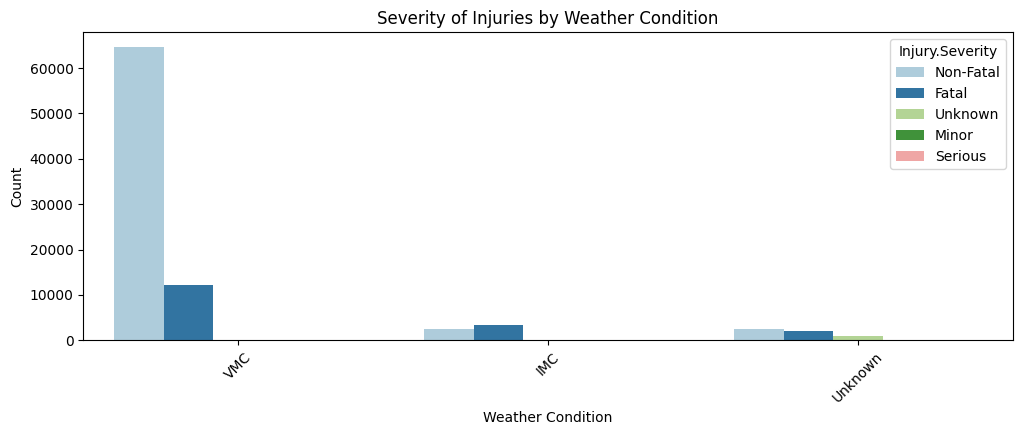

In [57]:
# Severity of the injuries by weather condition
injuries_weather = aviation.groupby(['Weather.Condition', 'Injury.Severity']).size().reset_index(name='Count')
print(injuries_weather)
print('*'*150)

plt.figure(figsize=(12, 4))
sns.countplot(x='Weather.Condition', hue='Injury.Severity', data=aviation, palette='Paired')
plt.title('Severity of Injuries by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### **b. Severity of Injuries by Broad Phase of Flight**
**Insights**
- The figure shows that many events occured during landing and take-off.
- In both cases, non-fatal injuries were more than fatal and other injuries.
- Cruise, approach and maneuvering also show significant fatal and non-fatal events.

**N/B:** The significant number of events with `Unknown` Phase of Flight (27,713, 31%) may indicate data recording issues that can be improved. All minor, serious and Unknown injury severities were all under Unknown Phase of Flight.

   Broad.phase.of.flight Injury.Severity  Count
0               Approach           Fatal   1596
1               Approach       Non-Fatal   4949
2                  Climb           Fatal    618
3                  Climb       Non-Fatal   1415
4                 Cruise           Fatal   2778
5                 Cruise       Non-Fatal   7488
6                Descent           Fatal    457
7                Descent       Non-Fatal   1430
8              Go-around           Fatal    267
9              Go-around       Non-Fatal   1086
10               Landing           Fatal    291
11               Landing       Non-Fatal  15136
12               Landing         Unknown      1
13           Maneuvering           Fatal   3183
14           Maneuvering       Non-Fatal   4961
15                 Other           Fatal     45
16                 Other       Non-Fatal     74
17              Standing           Fatal    101
18              Standing       Non-Fatal    842
19              Standing         Unknown

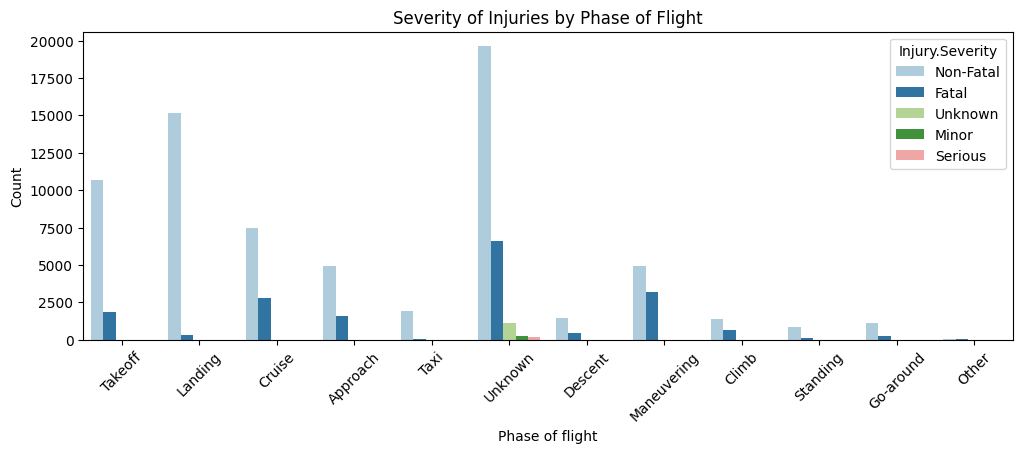

In [58]:
phase_flight_severity = aviation.groupby(['Broad.phase.of.flight', 'Injury.Severity']).size().reset_index(name='Count')
print(phase_flight_severity)
print('*'*150)

# bar chart
plt.figure(figsize=(12, 4))
sns.countplot(x='Broad.phase.of.flight', hue='Injury.Severity', data=aviation, palette='Paired')
plt.title('Severity of Injuries by Phase of Flight')
plt.xlabel('Phase of flight')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### **c. Fatalities by Broad Phase of Flight**
- Many fatalities occured during Cruise, Maneuvering (turning, climbing, or descending close to the ground), Takeoff and Approach.

   Broad.phase.of.flight  Total.Fatal.Injuries
0               Approach                  3841
1                  Climb                  1762
2                 Cruise                  6166
3                Descent                   913
4              Go-around                   587
5                Landing                   518
6            Maneuvering                  5323
7                  Other                    85
8               Standing                   161
9                Takeoff                  4304
10                  Taxi                   102
11               Unknown                 26423
******************************************************************************************************************************************************


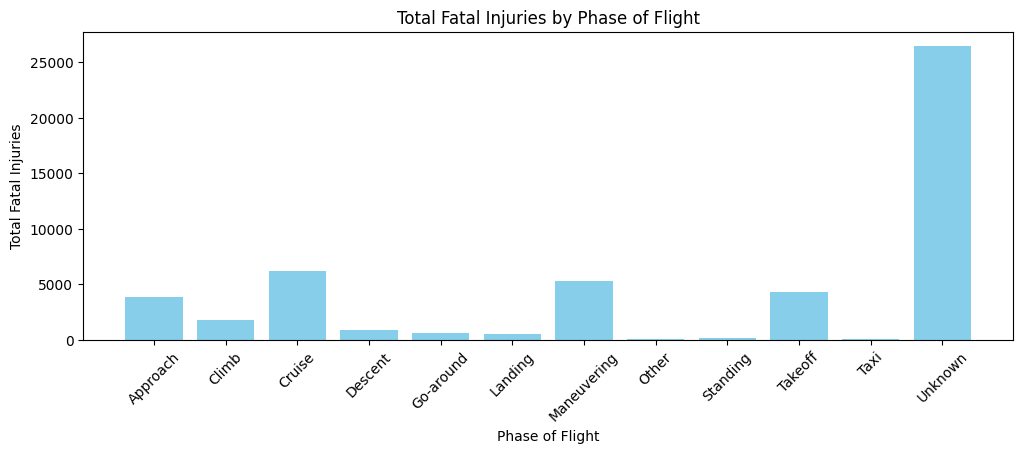

In [59]:
phase_flight_fatalities = aviation.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries'].sum().reset_index()
print(phase_flight_fatalities)
print('*'*150)

# bar chart
plt.figure(figsize=(12, 4))
plt.bar(phase_flight_fatalities['Broad.phase.of.flight'], phase_flight_fatalities['Total.Fatal.Injuries'], color='skyblue')
plt.xlabel('Phase of Flight')
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries by Phase of Flight')
plt.xticks(rotation=45)
plt.show()

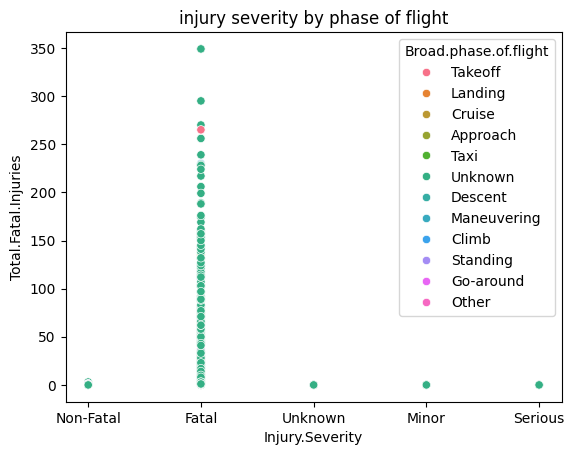

In [60]:
#check relationship between Injury.Severity, Total.Fatal.Injuries and Broad.phase.of.flight
sns.scatterplot(x='Injury.Severity', y='Total.Fatal.Injuries', hue='Broad.phase.of.flight', data=aviation)
plt.title("injury severity by phase of flight")
plt.show()